# 1. Setup and Load Data

### 1.1 Import Necessary Libraries/Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import imghdr

C:\Users\jedia\AppData\Local\Temp\ipykernel_26864\481032007.py:9: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


### 1.2 Look Through Images (EDA)

In [2]:
img_dir_train = 'Training Data'

In [3]:
classes_train = os.listdir(img_dir_train)
classes_train

['NORMAL', 'PNEUMONIA']

In [4]:
class_counts = {class_name: len(os.listdir(os.path.join(img_dir_train, class_name))) for class_name in classes_train}

for class_name, count in class_counts.items():
    print(f'{class_name}: {count} images')

NORMAL: 1349 images
PNEUMONIA: 3883 images


In [5]:
img_dir_test = 'Test Data'

In [6]:
classes_test = os.listdir(img_dir_test)
classes_test

['NORMAL', 'PNEUMONIA']

In [7]:
class_counts = {class_name: len(os.listdir(os.path.join(img_dir_test, class_name))) for class_name in classes_test}

for class_name, count in class_counts.items():
    print(f'{class_name}: {count} images')

NORMAL: 234 images
PNEUMONIA: 390 images


In [8]:
# Confirming NORMAL class image count
len(os.listdir(os.path.join(img_dir_train, 'NORMAL')))

1349

In [9]:
# Displaying training files in NORMAL class
os.listdir(os.path.join(img_dir_train, 'NORMAL'))

['NORMAL-1003233-0001.jpeg',
 'NORMAL-1012843-0001.jpeg',
 'NORMAL-1014768-0001.jpeg',
 'NORMAL-1023731-0001.jpeg',
 'NORMAL-1029510-0001.jpeg',
 'NORMAL-1031320-0001.jpeg',
 'NORMAL-1034239-0001.jpeg',
 'NORMAL-1041364-0001.jpeg',
 'NORMAL-1044645-0001.jpeg',
 'NORMAL-1055663-0001.jpeg',
 'NORMAL-1063934-0001.jpeg',
 'NORMAL-1064313-0001.jpeg',
 'NORMAL-1064313-0002.jpeg',
 'NORMAL-1068231-0001.jpeg',
 'NORMAL-1068326-0001.jpeg',
 'NORMAL-1070073-0001.jpeg',
 'NORMAL-1070073-0002.jpeg',
 'NORMAL-1080088-0001.jpeg',
 'NORMAL-1097039-0001.jpeg',
 'NORMAL-1101909-0001.jpeg',
 'NORMAL-1128157-0001.jpeg',
 'NORMAL-1140710-0001.jpeg',
 'NORMAL-1150393-0001.jpeg',
 'NORMAL-1156778-0001.jpeg',
 'NORMAL-1165014-0001.jpeg',
 'NORMAL-1165014-0002.jpeg',
 'NORMAL-1170804-0001.jpeg',
 'NORMAL-1177627-0001.jpeg',
 'NORMAL-1196989-0001.jpeg',
 'NORMAL-1203236-0001.jpeg',
 'NORMAL-1206638-0001.jpeg',
 'NORMAL-1241506-0001.jpeg',
 'NORMAL-1243491-0001.jpeg',
 'NORMAL-1261648-0001.jpeg',
 'NORMAL-13115

In [10]:
# Confirming NORMAL class image count
len(os.listdir(os.path.join(img_dir_train, 'PNEUMONIA')))

3883

In [11]:
os.listdir(os.path.join(img_dir_train, 'PNEUMONIA'))

['BACTERIA-1008087-0001.jpeg',
 'BACTERIA-1025587-0001.jpeg',
 'BACTERIA-1027194-0001.jpeg',
 'BACTERIA-1033441-0001.jpeg',
 'BACTERIA-103798-0001.jpeg',
 'BACTERIA-103798-0002.jpeg',
 'BACTERIA-1039608-0001.jpeg',
 'BACTERIA-1040986-0001.jpeg',
 'BACTERIA-1041881-0001.jpeg',
 'BACTERIA-1041881-0002.jpeg',
 'BACTERIA-104960-0001.jpeg',
 'BACTERIA-1065620-0001.jpeg',
 'BACTERIA-1065620-0002.jpeg',
 'BACTERIA-1069837-0001.jpeg',
 'BACTERIA-1069837-0002.jpeg',
 'BACTERIA-1074715-0001.jpeg',
 'BACTERIA-1076722-0001.jpeg',
 'BACTERIA-1083680-0001.jpeg',
 'BACTERIA-1083680-0002.jpeg',
 'BACTERIA-1083680-0003.jpeg',
 'BACTERIA-1083680-0004.jpeg',
 'BACTERIA-1083680-0005.jpeg',
 'BACTERIA-1083680-0006.jpeg',
 'BACTERIA-1083680-0007.jpeg',
 'BACTERIA-1083680-0008.jpeg',
 'BACTERIA-1083680-0009.jpeg',
 'BACTERIA-1083680-0010.jpeg',
 'BACTERIA-1083680-0011.jpeg',
 'BACTERIA-1083680-0012.jpeg',
 'BACTERIA-1083680-0013.jpeg',
 'BACTERIA-1083680-0014.jpeg',
 'BACTERIA-1083680-0015.jpeg',
 'BACTERIA-

In [12]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [13]:
image_exts[0]

'jpeg'

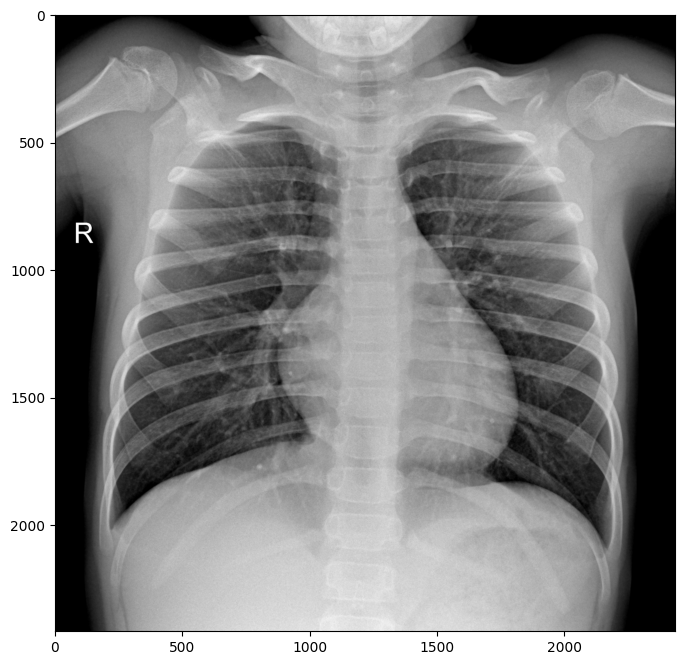

In [14]:
# Accessing and Displaying Normal X-ray from directory

img = cv2.imread(os.path.join('Training Data', 'NORMAL', 'NORMAL-28501-0001.jpeg'))

plt.figure(figsize=(10, 8))

plt.imshow(img)
plt.show()

In [15]:
img.shape

(2418, 2434, 3)

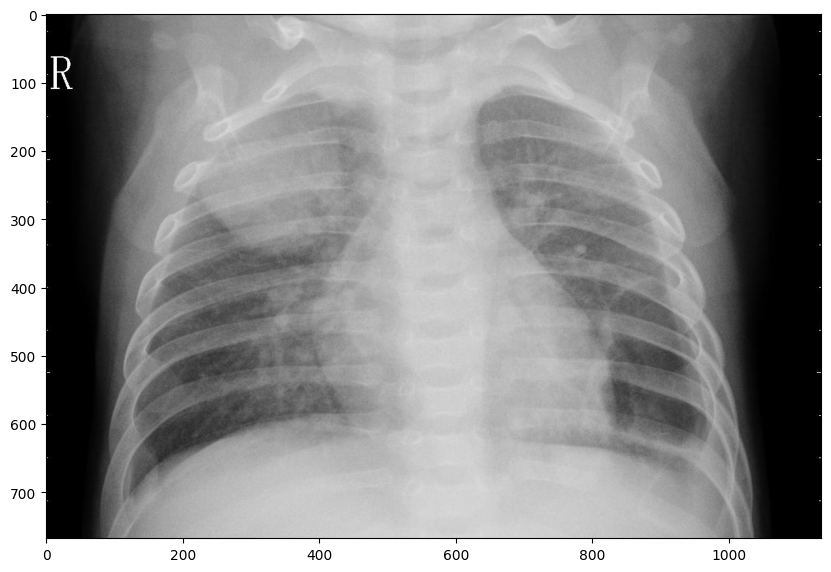

In [16]:
# Accessing and Displaying Pneumonia(Bacterial) X-ray from directory

img_pn_b = cv2.imread(os.path.join('Training Data','PNEUMONIA','BACTERIA-84621-0001.jpeg'))

plt.figure(figsize=(10, 8))

plt.imshow(img_pn_b)
plt.show()

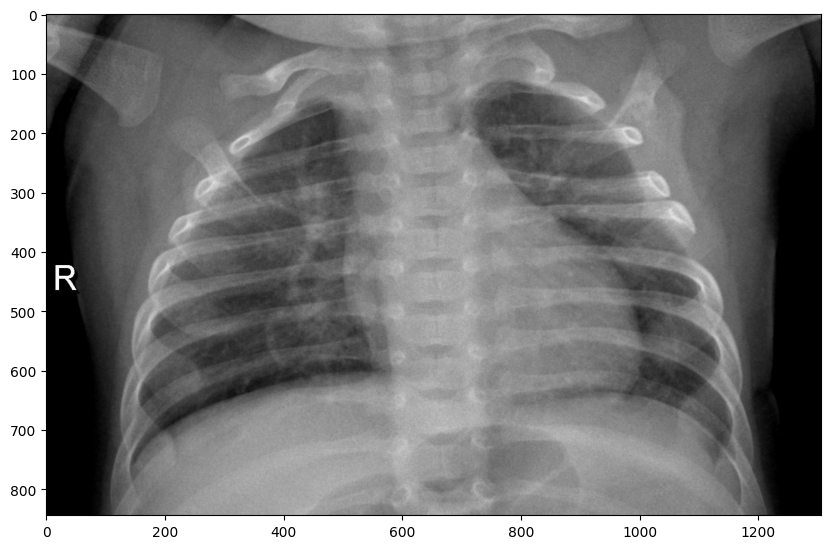

In [17]:
# Accessing and Displaying Pneumonia(Viral) X-ray from directory

img_pn_v = cv2.imread(os.path.join('Training Data','PNEUMONIA','VIRUS-4757979-0003.jpeg'))

plt.figure(figsize=(10, 8))

plt.imshow(img_pn_v)
plt.show()

### 1.3 Loading  Data

In [18]:
# 80% Training Split
train_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,image_size=(256,256))

Found 5232 files belonging to 2 classes.
Using 4186 files for training.


In [19]:
# 20% Validation Split
val_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123, image_size=(256,256))

Found 5232 files belonging to 2 classes.
Using 1046 files for validation.


In [20]:
# Test Split
test_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir_test,
  seed=123, image_size=(256,256))

Found 624 files belonging to 2 classes.


In [21]:
classes = os.listdir(img_dir_train)
class_names = np.array(classes)

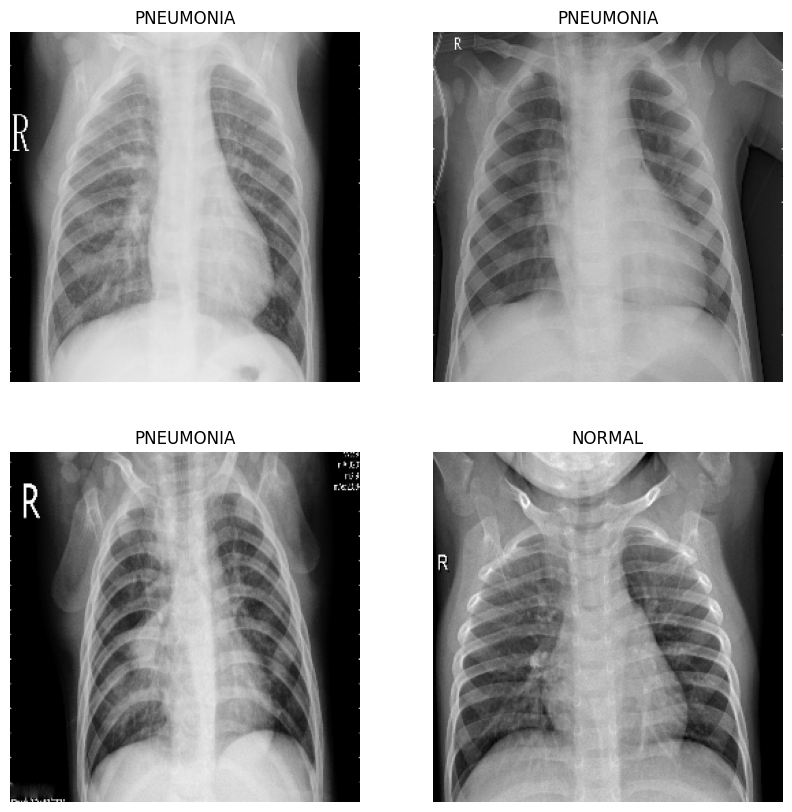

In [22]:
# Diplaying x-ray images with class labels
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2,2,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# 2 Deep Modeling

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.metrics import Precision, Recall

### 2.1 Model A

In [81]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [82]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [90]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [91]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [98]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 64)       

In [101]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
131/131 [==============================] - 67s 486ms/step - loss: 0.3357 - accuracy: 0.8851 - val_loss: 0.1213 - val_accuracy: 0.9551
Epoch 2/10
131/131 [==============================] - 59s 449ms/step - loss: 0.1024 - accuracy: 0.9620 - val_loss: 0.0697 - val_accuracy: 0.9761
Epoch 3/10
131/131 [==============================] - 58s 445ms/step - loss: 0.0745 - accuracy: 0.9694 - val_loss: 0.0805 - val_accuracy: 0.9732
Epoch 4/10
131/131 [==============================] - 57s 435ms/step - loss: 0.0486 - accuracy: 0.9828 - val_loss: 0.0724 - val_accuracy: 0.9723
Epoch 5/10
131/131 [==============================] - 58s 443ms/step - loss: 0.0327 - accuracy: 0.9885 - val_loss: 0.1020 - val_accuracy: 0.9637
Epoch 6/10
131/131 [==============================] - 57s 436ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0767 - val_accuracy: 0.9742
Epoch 7/10
131/131 [==============================] - 58s 445ms/step - loss: 0.0255 - accuracy: 0.9912 - val_loss: 0.1163 - val_ac

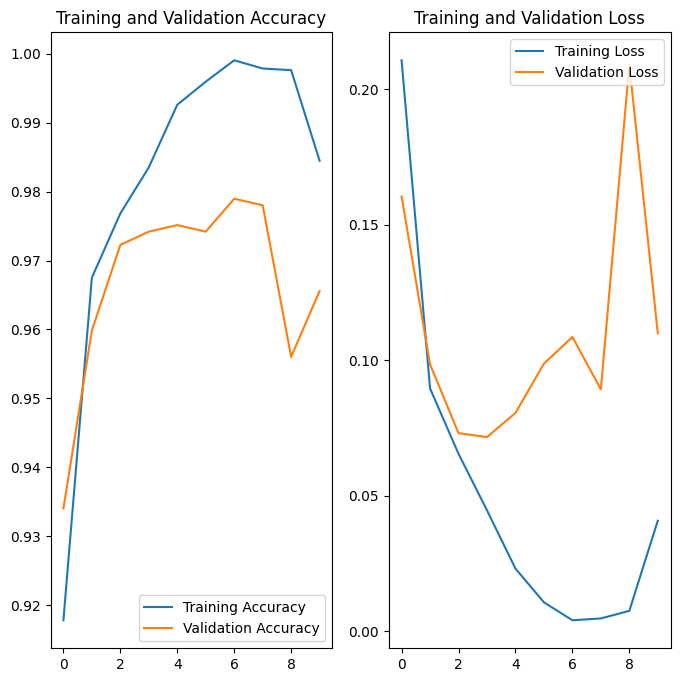

In [353]:
acc = history.history['f1_score']
val_acc = history.history['val_f1_score']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training f1_score')
plt.plot(epochs_range, val_acc, label='Validation f1_score')
plt.legend(loc='lower right')
plt.title('Training and Validation F1 Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 2.2 Model B

In [354]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [355]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [356]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [357]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_31 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_28 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_63 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                               

In [358]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
131/131 [==============================] - 82s 605ms/step - loss: 0.5138 - accuracy: 0.7702 - val_loss: 0.1923 - val_accuracy: 0.9293
Epoch 2/15
131/131 [==============================] - 78s 597ms/step - loss: 0.2658 - accuracy: 0.8875 - val_loss: 0.1586 - val_accuracy: 0.9407
Epoch 3/15
131/131 [==============================] - 81s 622ms/step - loss: 0.1928 - accuracy: 0.9276 - val_loss: 0.1219 - val_accuracy: 0.9532
Epoch 4/15
131/131 [==============================] - 82s 626ms/step - loss: 0.1637 - accuracy: 0.9365 - val_loss: 0.1698 - val_accuracy: 0.9359
Epoch 5/15
131/131 [==============================] - 91s 697ms/step - loss: 0.1605 - accuracy: 0.9367 - val_loss: 0.1099 - val_accuracy: 0.9598
Epoch 6/15
131/131 [==============================] - 90s 685ms/step - loss: 0.1547 - accuracy: 0.9427 - val_loss: 0.1174 - val_accuracy: 0.9579
Epoch 7/15
131/131 [==============================] - 90s 685ms/step - loss: 0.1579 - accuracy: 0.9424 - val_loss: 0.1108 - val_ac

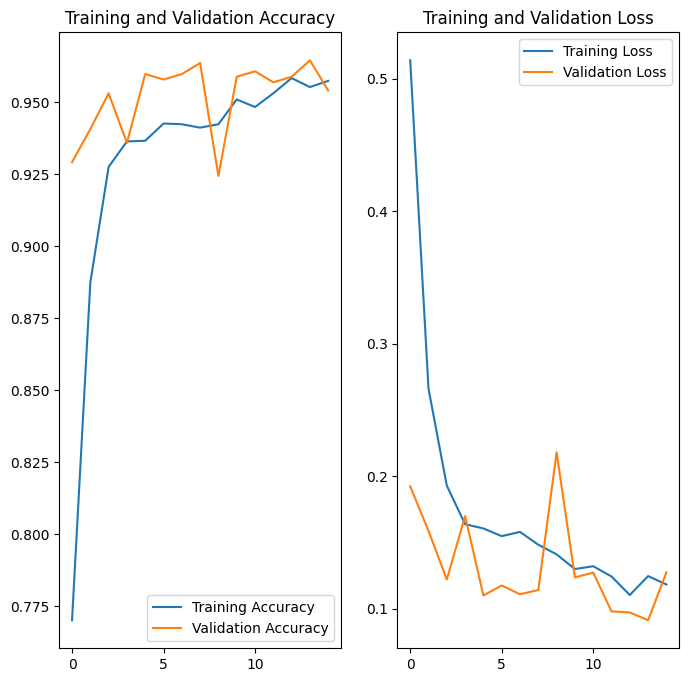

In [359]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 2.3 Model C 

In [70]:
model = Sequential()

In [71]:

model.add(Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['f1_score'])

In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)       

In [74]:
logdir = 'logs'

In [75]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [76]:
hist = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/20


TypeError: in user code:

    File "C:\Users\jedia\anaconda3\envs\image_env\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jedia\anaconda3\envs\image_env\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jedia\anaconda3\envs\image_env\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jedia\anaconda3\envs\image_env\Lib\site-packages\keras\src\engine\training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\jedia\anaconda3\envs\image_env\Lib\site-packages\keras\src\engine\training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\jedia\anaconda3\envs\image_env\Lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\jedia\anaconda3\envs\image_env\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "C:\Users\jedia\anaconda3\envs\image_env\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\jedia\anaconda3\envs\image_env\Lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


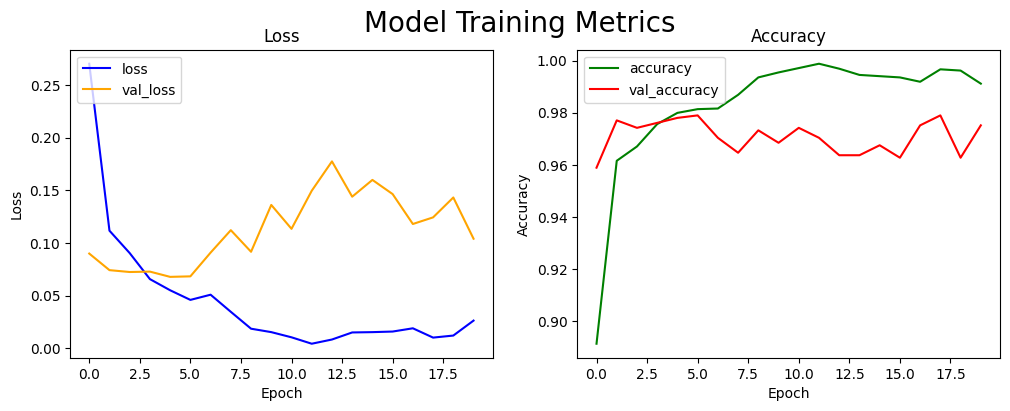

In [367]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training & validation loss values
ax1.plot(hist.history['loss'], color='blue', label='loss')
ax1.plot(hist.history['val_loss'], color='orange', label='val_loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc="upper left")

# Plot training & validation accuracy values
ax2.plot(hist.history['accuracy'], color='green', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc="upper left")

plt.suptitle('Model Training Metrics', fontsize=20)
plt.show()

In [368]:
model.evaluate(test_ds)

20/20 [==============================] - 9s 270ms/step - loss: 1.6229 - accuracy: 0.8221


[1.622922658920288, 0.8221153616905212]

In [369]:
model.evaluate(val_ds)

33/33 [==============================] - 7s 216ms/step - loss: 0.1040 - accuracy: 0.9751


[0.1039985790848732, 0.9751434326171875]